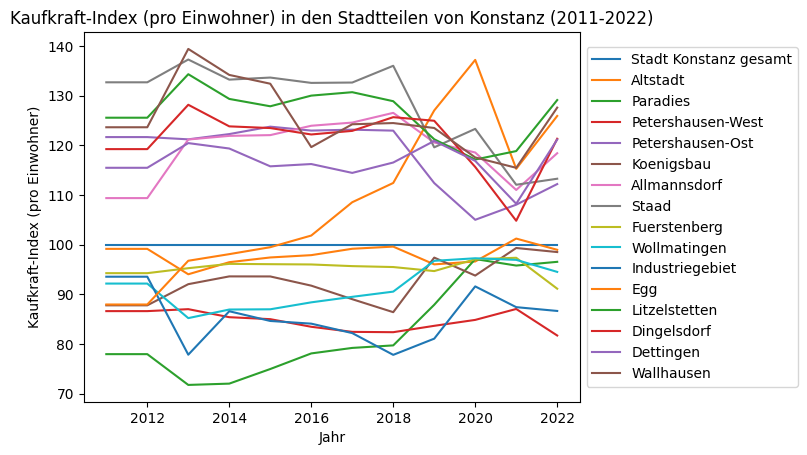

In [16]:
# svg data: AGS;Stadtteil_Nr;Stadtteil;Jahr ;Quelle;Kaufkraft-Index (pro Einwohner)
# read the csv file "kaufkraft.csv"
# plot Kaufkraft-Index (pro Einwohner) for each Stadtteil over the years
# save the plot as "kaufkraft.png"

import csv
import matplotlib.pyplot as plt

kaufkraft = dict()

# read the csv file "kaufkraft.csv"
with open("Kaufkraftindex_Stadtteile_2011-2022.csv") as f:
    reader = csv.reader(f, delimiter=";")
    header = next(reader)
    for row in reader:
        if row[2] not in kaufkraft:
            kaufkraft[row[2]] = []
        kaufkraft[row[2]].append(row)

# plot Kaufkraft-Index (pro Einwohner) for each Stadtteil over the years
fig, ax = plt.subplots()
for stadtteil, data in kaufkraft.items():
    jahre = [int(row[3]) for row in data]
    kaufkraft_index = [float(row[5].replace(",", ".")) for row in data]
    ax.plot(jahre, kaufkraft_index, label=stadtteil)

# sort the legend alphabetically
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Kaufkraft-Index (pro Einwohner) in den Stadtteilen von Konstanz (2011-2022)")
plt.xlabel("Jahr")
plt.ylabel("Kaufkraft-Index (pro Einwohner)")

# save the plot as "kaufkraft.png" with full legend
plt.savefig("kaufkraft.png", bbox_inches="tight")
plt.show()

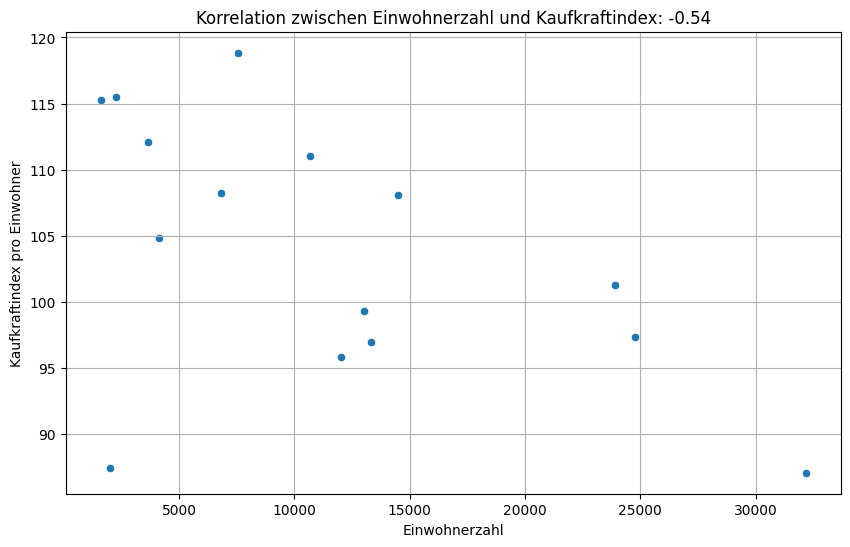

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Daten laden
einwohner_data = pd.read_csv('Einwohner_nach_Stadtviertel_2010-2023.csv', delimiter=';')
kaufkraft_data = pd.read_csv('Kaufkraftindex_Stadtteile_2011-2022.csv', delimiter=';')

def plot_data(year):
    # Daten vorbereiten
    einwohner_latest = einwohner_data[einwohner_data['Stand_Einwohner'].str.contains(str(year))].copy()
    kaufkraft_latest = kaufkraft_data[kaufkraft_data['Jahr '] == year].copy()

    # Daten aggregieren nach Stadtteil, um die Gesamteinwohnerzahl zu erhalten
    einwohner_agg = einwohner_latest.groupby('STADTTEIL')['EINW_HW_GESAMT'].sum().reset_index()

    # Kaufkraftindex-Daten bereinigen, falls nötig
    kaufkraft_latest['Kaufkraft-Index (pro Einwohner)'] = pd.to_numeric(kaufkraft_latest['Kaufkraft-Index (pro Einwohner)'].str.replace(',', '.'))

    # Daten zusammenführen
    merged_data = pd.merge(einwohner_agg, kaufkraft_latest, left_on='STADTTEIL', right_on='Stadtteil')

    # Korrelation berechnen
    correlation = merged_data['EINW_HW_GESAMT'].corr(merged_data['Kaufkraft-Index (pro Einwohner)'])

    # Plot
    plt.figure(figsize=(10, 6))
    sns.regplot(data=merged_data, x='EINW_HW_GESAMT', y='Kaufkraft-Index (pro Einwohner)', scatter_kws={'s':50}, line_kws={"color": "red"})
    plt.title(f'Korrelation zwischen Einwohnerzahl und Kaufkraftindex für das Jahr {year}: {correlation:.2f}')
    plt.xlabel('Einwohnerzahl')
    plt.ylabel('Kaufkraftindex pro Einwohner')
    plt.grid(True)
    plt.show()

# Erstellung des Dropdown-Menüs
year_dropdown = widgets.Dropdown(
    options=[(str(year), year) for year in range(2011, 2023)],
    value=2022,
    description='Jahr:',
)

# Interaktive Widget-Anzeige
widgets.interactive(plot_data, year=year_dropdown)


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

einwohner_data = pd.read_csv('Einwohner_nach_Stadtviertel_2010-2023.csv', delimiter=';')
einwohner_data['Stand_Einwohner'] = pd.to_datetime(einwohner_data['Stand_Einwohner'], format='%d.%m.%Y', errors='coerce')

age_columns = ['EINW_HW_unter18', 'EINW_HW_18_bis_unter_30', 'EINW_HW_30_bis_unter_40', 'EINW_HW_40_bis_unter_50', 'EINW_HW_50_bis_unter_60', 'EINW_HW_60_und_aelter']
melted_data = einwohner_data.melt(id_vars=['STADTTEIL'], value_vars=age_columns, var_name='Age_Group', value_name='Population')

def plot_age_distribution(stadtteil):
    data = melted_data[melted_data['STADTTEIL'] == stadtteil]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='Age_Group', y='Population', hue='Age_Group', palette='viridis', legend=False, errorbar=None)
    plt.title(f'Altersverteilung in {stadtteil}')
    plt.ylabel('Anzahl der Einwohner')
    plt.xlabel('Altersgruppe')
    plt.xticks(rotation=45)
    plt.show()

# Dropdown für die Auswahl des Stadtteils
interact(plot_age_distribution, stadtteil=sorted(einwohner_data['STADTTEIL'].unique()))



interactive(children=(Dropdown(description='stadtteil', options=('Allmannsdorf', 'Altstadt', 'Dettingen', 'Din…

<function __main__.plot_age_distribution(stadtteil)>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

einwohner_data = pd.read_csv('Einwohner_nach_Stadtviertel_2010-2023.csv', delimiter=';')
einwohner_data['Stand_Einwohner'] = pd.to_datetime(einwohner_data['Stand_Einwohner'], format='%d.%m.%Y', errors='coerce')

age_groups = {
    'EINW_HW_unter18': 9,
    'EINW_HW_18_bis_unter_30': 24,
    'EINW_HW_30_bis_unter_40': 35,
    'EINW_HW_40_bis_unter_50': 45,
    'EINW_HW_50_bis_unter_60': 55,
    'EINW_HW_60_und_aelter': 70
}

def plot_age_distribution(year):
    filtered_data = einwohner_data[einwohner_data['Stand_Einwohner'].dt.year == year]
    age_distribution = pd.DataFrame()
    
    for column, age in age_groups.items():
        temp = filtered_data[['STADTTEIL', column]].copy()
        temp['Age'] = age
        temp['Count'] = temp[column].fillna(0).astype(int)
        temp = temp[temp['Count'] > 0]
        temp = temp.loc[temp.index.repeat(temp['Count'])]
        temp['Age'] = age
        age_distribution = pd.concat([age_distribution, temp], ignore_index=True)
    
    age_distribution.drop(columns=['Count'], inplace=True)
    
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=age_distribution, x='STADTTEIL', y='Age', hue='STADTTEIL', palette='viridis')
    plt.title(f'Altersverteilung über Stadtteile in Konstanz für das Jahr {year}')
    plt.xlabel('Stadtteil')
    plt.ylabel('Alter')
    plt.xticks(rotation=45)
    plt.show()

years = sorted(einwohner_data['Stand_Einwohner'].dt.year.unique())
interact(plot_age_distribution, year=years)


interactive(children=(Dropdown(description='year', options=(2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 20…

<function __main__.plot_age_distribution(year)>